In [7]:
from environment import Environment
from agent import Agent
from trainer import Q_learning_trainer, One_step_variational_trainer, Final_variational_trainer, KL_Q_learning_trainer
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Hyperparameters

In [9]:
N = 30000 # Number of episodes
side = 40

In [10]:
# Agent/Environment initialization

In [11]:
env = Environment.square(initial_state_range=0, side = side)

#agent = Agent(GAMMA = 1)
BETA = 4 #5 #
ALPHA_REF = 1e-2
OBS_LEAK = 1e-1 / env.N_obs

agent = Agent(env, GAMMA=1, ALPHA=ALPHA_REF / BETA, BETA=BETA, do_reward = True)
trainer = Final_variational_trainer(agent, OBS_LEAK=OBS_LEAK, final = True, monte_carlo = True, ref_prob='unif')


#agent = Agent(env, GAMMA=1, ALPHA=0.1, BETA=15, do_reward = True)


#trainer = Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True)
#trainer = KL_Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True, final = True)
#trainer = one_step_variational_trainer(agent)


{0: {'E': 1, 'S': 40}, 1: {'E': 2, 'W': 0, 'S': 41}, 2: {'E': 3, 'W': 1, 'S': 42}, 3: {'E': 4, 'W': 2, 'S': 43}, 4: {'E': 5, 'W': 3, 'S': 44}, 5: {'E': 6, 'W': 4, 'S': 45}, 6: {'E': 7, 'W': 5, 'S': 46}, 7: {'E': 8, 'W': 6, 'S': 47}, 8: {'E': 9, 'W': 7, 'S': 48}, 9: {'E': 10, 'W': 8, 'S': 49}, 10: {'E': 11, 'W': 9, 'S': 50}, 11: {'E': 12, 'W': 10, 'S': 51}, 12: {'E': 13, 'W': 11, 'S': 52}, 13: {'E': 14, 'W': 12, 'S': 53}, 14: {'E': 15, 'W': 13, 'S': 54}, 15: {'E': 16, 'W': 14, 'S': 55}, 16: {'E': 17, 'W': 15, 'S': 56}, 17: {'E': 18, 'W': 16, 'S': 57}, 18: {'E': 19, 'W': 17, 'S': 58}, 19: {'E': 20, 'W': 18, 'S': 59}, 20: {'E': 21, 'W': 19, 'S': 60}, 21: {'E': 22, 'W': 20, 'S': 61}, 22: {'E': 23, 'W': 21, 'S': 62}, 23: {'E': 24, 'W': 22, 'S': 63}, 24: {'E': 25, 'W': 23, 'S': 64}, 25: {'E': 26, 'W': 24, 'S': 65}, 26: {'E': 27, 'W': 25, 'S': 66}, 27: {'E': 28, 'W': 26, 'S': 67}, 28: {'E': 29, 'W': 27, 'S': 68}, 29: {'E': 30, 'W': 28, 'S': 69}, 30: {'E': 31, 'W': 29, 'S': 70}, 31: {'E': 32, 

In [12]:
if True:
    mem_pi = []
    mem_KL = []
    mem_TD = []
for i in range(N):
    trainer.run_episode()
    past_obs = trainer.trajectory[-2]
    past_action = trainer.action_history[-1]
    obs = trainer.trajectory[-1]
    reward = trainer.reward_history[-1]
    mem_pi += [trainer.agent.softmax(past_obs)[past_action]]
    mem_KL += [trainer.KL(past_obs,past_action,obs,done=True)]
    mem_TD += [trainer.TD_err_var(past_obs,past_action,obs,reward,done=True)]
    if i%1000 ==0:
        #plt.figure(figsize = (4, 4))
        #plt.plot(agent.KL.flatten())
        print(trainer.nb_trials)
        print("Trajectory: ", trainer.trajectory)
        print("past_obs :", past_obs, ", final Q:", trainer.agent.Q_var[past_obs])
        print("final policy :", trainer.agent.softmax(past_obs))
        print("Final reward: ", reward)
        print("final KL :", trainer.KL(past_obs,past_action,obs,done=True))
        print("final TD error :", trainer.TD_err_var(past_obs,past_action,obs,reward,done=True))

1
Trajectory:  [0, 40, 41, 40, 41, 40, 41, 40, 80, 81, 41, 40, 41, 42, 2, 2, 42, 43, 3, 3, 4, 3, 43, 3, 43, 83, 84, 44, 84, 83, 82, 122, 82, 42, 41, 1, 41, 1, 0, 0, 0, 1, 2, 3, 43, 3, 43, 42, 2, 42, 41, 81, 80, 81, 41, 40, 80, 80, 81, 41, 1, 1, 1, 2, 1, 41, 42, 41, 81, 121, 120, 120, 121, 81, 41, 42, 2, 3, 2]
past_obs : 3 , final Q: [-0.02152456 -0.08788934 -0.0207343  -0.02167779]
final policy : [0.26529371 0.20344149 0.26613365 0.26513116]
Final reward:  0
final KL : 2.890371757896165
final TD error : 0.020734296606783564
1001
Trajectory:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
past_obs : 0 , final Q: [-2.46582124 -2.26383939 -2.37034836 -0.00489318]
final policy : [5.30666370e-05 1.19041938e-04 7.77454445e-05 9.99750146e-01]
Final reward:  0
final KL : 4.903143984623726
final TD error : 

15001
Trajectory:  [0, 40, 80, 81, 121, 122, 123, 124, 125, 126, 127, 126, 86, 46, 6, 5, 45, 85, 45, 44, 84, 85, 86, 46, 6, 7, 47, 87, 47, 48, 49, 89, 90, 130, 90, 91, 92, 91, 92, 93, 92, 132, 131, 171, 172, 212, 211, 251, 291, 292, 332, 372, 373, 374, 373, 372, 412, 372, 412, 411, 371, 372, 373, 374, 375, 335, 375, 335, 295, 296, 297, 298, 297, 296, 295, 296, 256, 257, 217]
past_obs : 257 , final Q: [0.65254513 0.41437808 0.32568687 0.49654058]
final policy : [0.45620203 0.17596191 0.12340884 0.24442722]
Final reward:  0
final KL : 0.6020993311264968
final TD error : -0.49654058203556667
16001
Trajectory:  [0, 40, 41, 81, 121, 122, 123, 124, 164, 163, 203, 204, 205, 204, 203, 202, 242, 241, 201, 241, 242, 282, 322, 362, 363, 364, 404, 444, 404, 444, 445, 485, 445, 446, 486, 526, 525, 524, 523, 483, 523, 522, 562, 563, 523, 563, 523, 563, 564, 524, 484, 485, 484, 483, 482, 522, 482, 481, 480, 481, 521, 520, 520, 520, 480, 480, 520, 560, 561, 560, 561, 601, 641, 642, 682, 683, 682, 642,

29001
Trajectory:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
past_obs : 0 , final Q: [-2.42151525 -1.84351432 -2.88506039 -0.01554909]
final policy : [6.60823788e-05 6.67077264e-04 1.03472581e-05 9.99256493e-01]
Final reward:  0
final KL : 5.230209462586171
final TD error : 0.01554909098173525


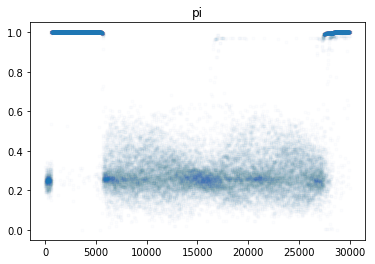

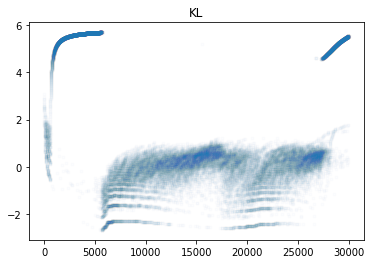

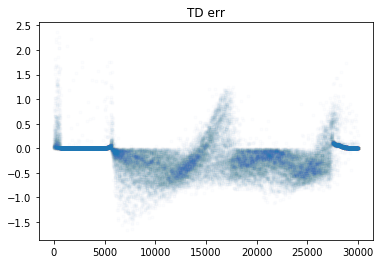

In [13]:
plt.plot(mem_pi,'.', alpha = 0.01)
plt.title('pi')
plt.show()
plt.plot(mem_KL,'.', alpha = 0.01)
plt.title('KL')
plt.show()
plt.plot(mem_TD,'.', alpha = 0.01)
plt.title('TD err')
plt.show()


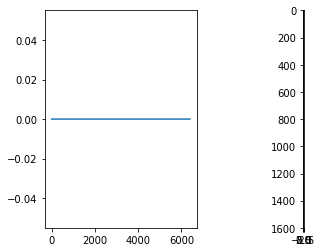

In [14]:
plt.subplot(1,2,1)
plt.plot(agent.Q_ref.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_ref)
plt.show()

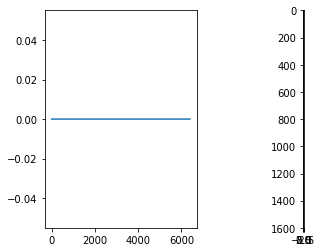

In [15]:
#print('KL', agent.KL)
plt.subplot(1,2,1)
plt.plot(agent.KL.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.KL)
plt.show()

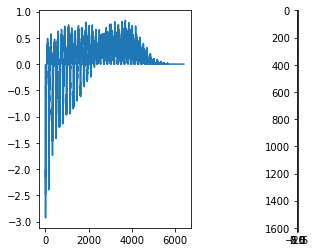

In [16]:
plt.subplot(1,2,1)
plt.plot(agent.Q_var.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_var)
plt.show()

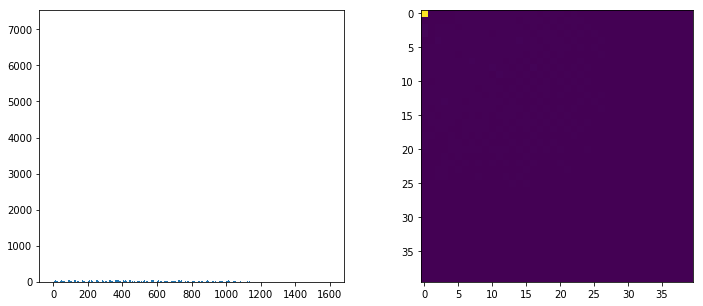

In [17]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits_final)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits_final.reshape(side,side))
plt.show()

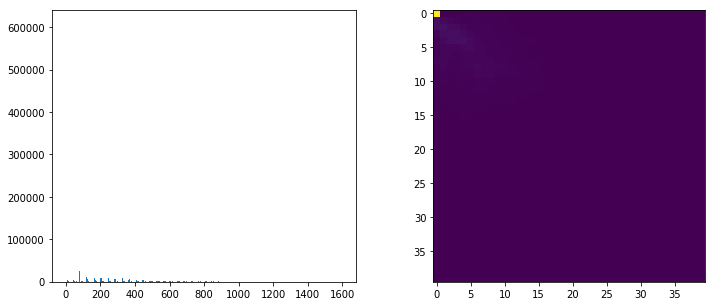

In [18]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits.reshape(side,side))
plt.show()

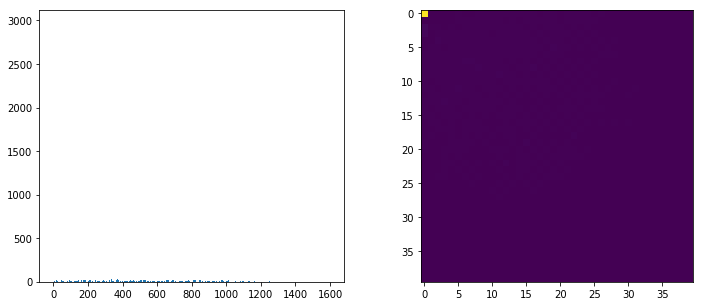

In [19]:
#print(trainer.obs_score_final)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score_final)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score_final.reshape(side,side))
plt.show()

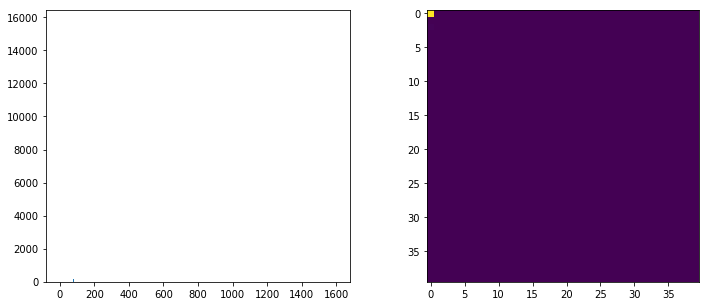

In [20]:
#print(trainer.obs_score)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score.reshape(side,side))
plt.show()

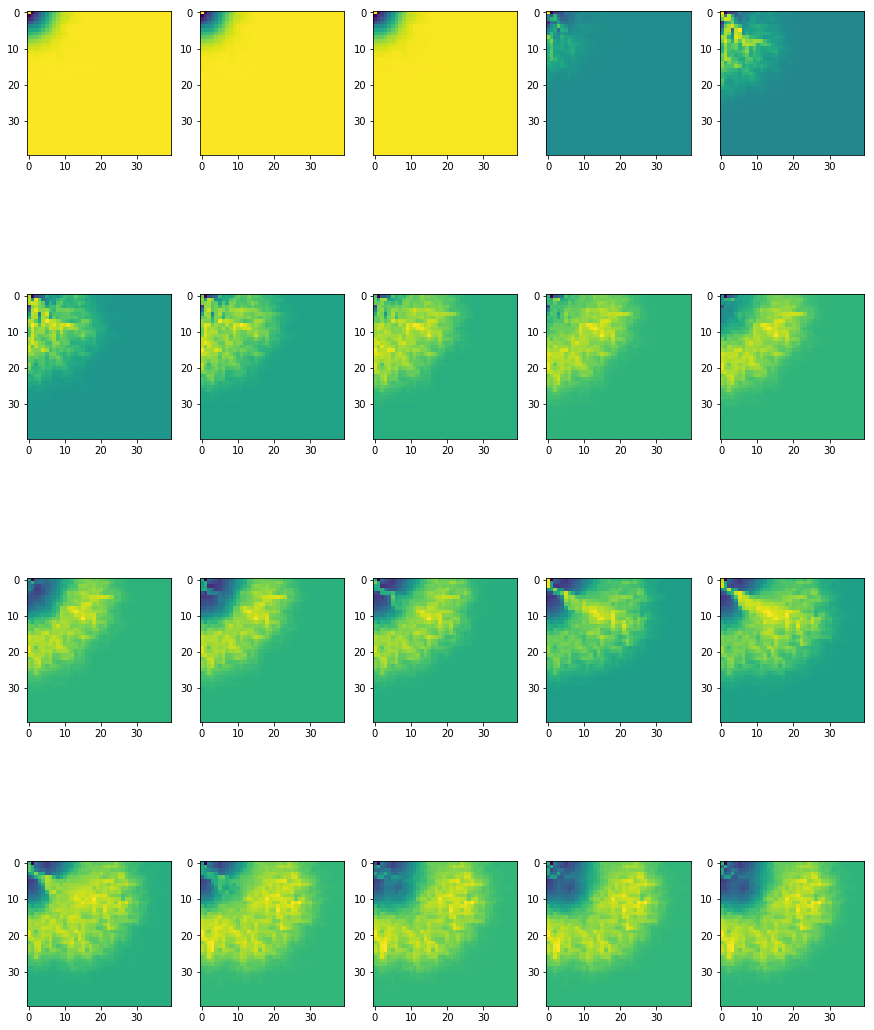

In [21]:
plt.figure(figsize=(15,20))
for i in range(1, 21):
    plt.subplot(4,5,i)
    plt.imshow(trainer.mem_V[i * N //20].reshape(side,side))
plt.show()